# The greedy algoirthm for graph coloring

## Generating graphs in networksx

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from itertools import combinations
import random


### Erdos-Rengy Graph adds vertex with probability p


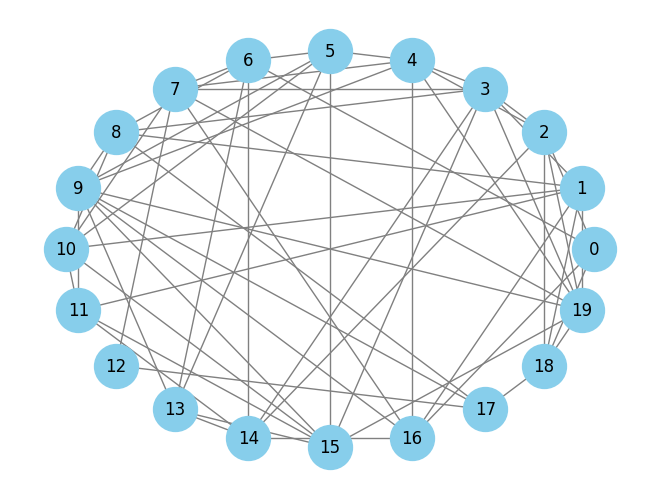

In [2]:
G = nx.erdos_renyi_graph(20, 0.3)#nx.Graph()
pos = nx.circular_layout(G)  # positions for all nodes. There are other possibilities fo layout...
nx.draw(G, pos,with_labels=True, node_color='skyblue', node_size=1000, edge_color='gray')
plt.show()

### Watts-Strogatz small world graph
#### nodes, starting with a ring lattice with each node connected to k nearest neighbors, and then edges are rewired with probability p.

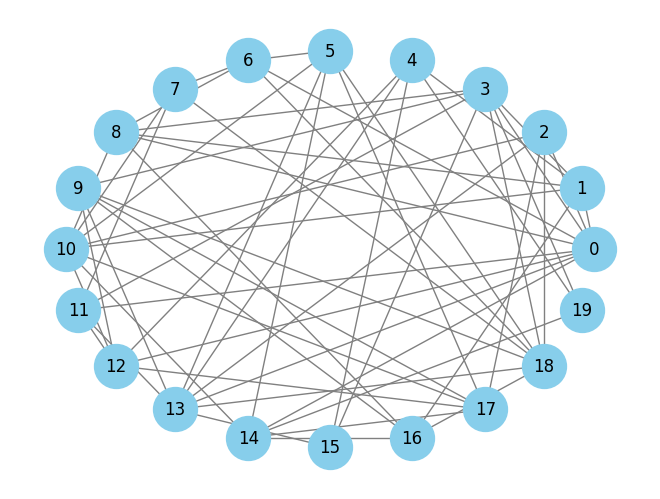

In [3]:

G = nx.erdos_renyi_graph(20, 0.3)#nx.Graph()
pos = nx.circular_layout(G)  # positions for all nodes. There are other possibilities fo layout...
nx.draw(G, pos,with_labels=True, node_color='skyblue', node_size=1000, edge_color='gray')
plt.show()

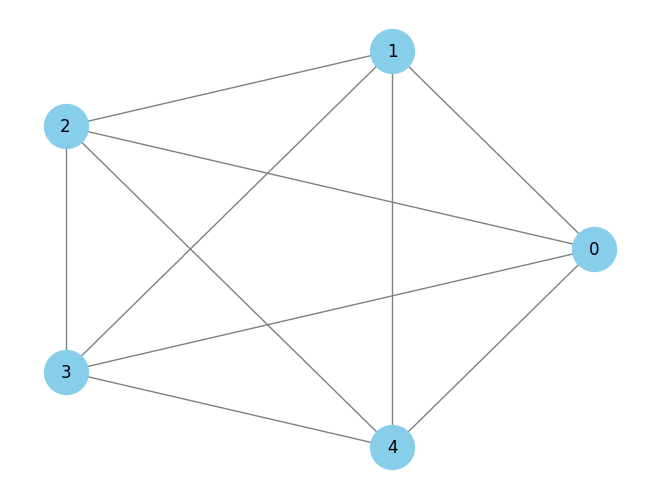

In [4]:
n=5
G=nx.complete_graph(n)
pos=nx.circular_layout(G)
nx.draw(G, pos,with_labels=True, node_color='skyblue', node_size=1000, edge_color='gray')
plt.show()


### Barbasi Albert Graph
#### Generates a graph by adding nodes one at a time, connecting each new node to m existing nodes with a probability proportional to their degree.


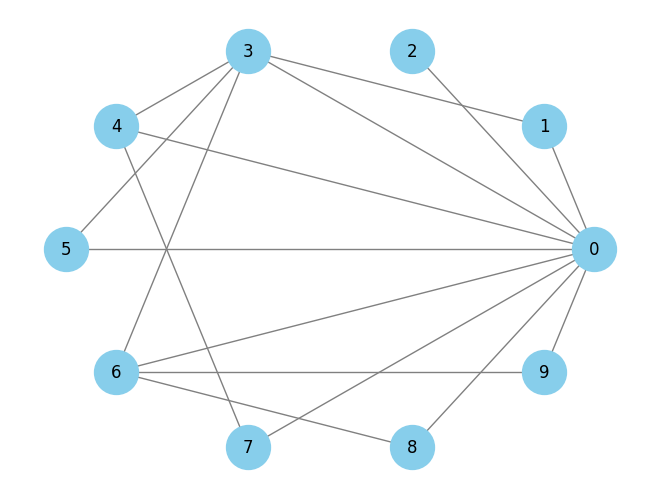

In [5]:
G = nx.barabasi_albert_graph(n=10, m=2)
pos = nx.circular_layout(G)  # positions for all nodes. There are other possibilities fo layout...
nx.draw(G, pos,with_labels=True, node_color='skyblue', node_size=1000, edge_color='gray')
plt.show()

### 2d Grid

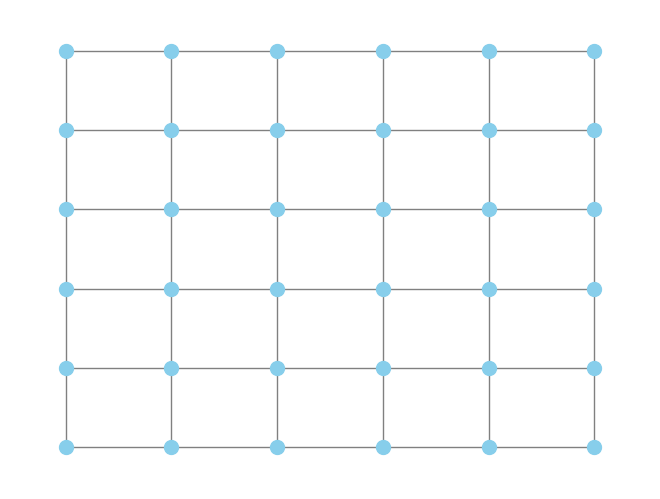

In [6]:
G = nx.grid_2d_graph(m=6, n=6)
pos = {(x, y): (y, -x) for x, y in G.nodes()} 
#pos = nx.circular_layout(G)  # positions for all nodes. There are other possibilities fo layout...
nx.draw(G,pos,with_labels=False, node_color='skyblue', node_size=100, edge_color='gray')
plt.show()

## Some other grid

In [7]:
def hexagonal_lattice_graph(n):
    G = nx.Graph()
    for x in range(-n+1, n):
        for y in range(-n+1, n):
            z = -x - y
            if -n < z and z < n:
                G.add_node((x, y, z))
    for node in G.nodes():
        x, y, z = node
        neighbors = [
            (x+1, y-1, z),
            (x+1, y, z-1),
            (x, y+1, z-1),
            (x-1, y+1, z),
            (x-1, y, z+1),
            (x, y-1, z+1)
        ]
        for neighbor in neighbors:
            if neighbor in G.nodes():
                G.add_edge(node, neighbor)
    return G



In [8]:
def hexagonal_positions(G):
    pos = dict()
    for node in G.nodes():
        x, y, z = node
        pos[node] = (1.5*x, np.sqrt(3) * (y + x/2))
    return pos


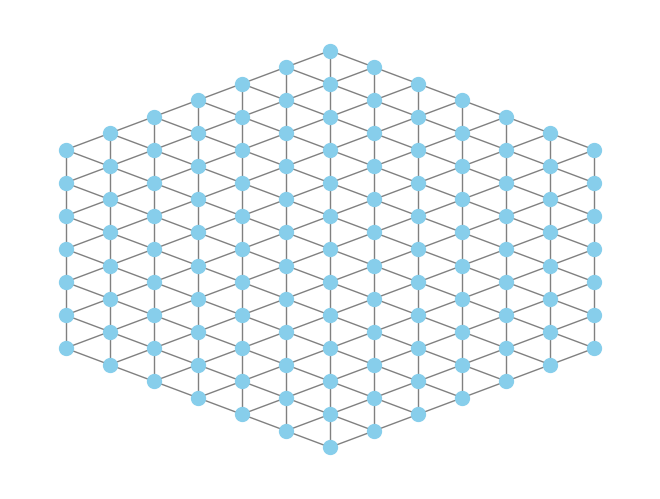

In [9]:
G = hexagonal_lattice_graph(7)
pos = hexagonal_positions(G)
nx.draw(G,pos,with_labels=False, node_color='skyblue', node_size=100, edge_color='gray')
plt.show()

### Make a list of colors

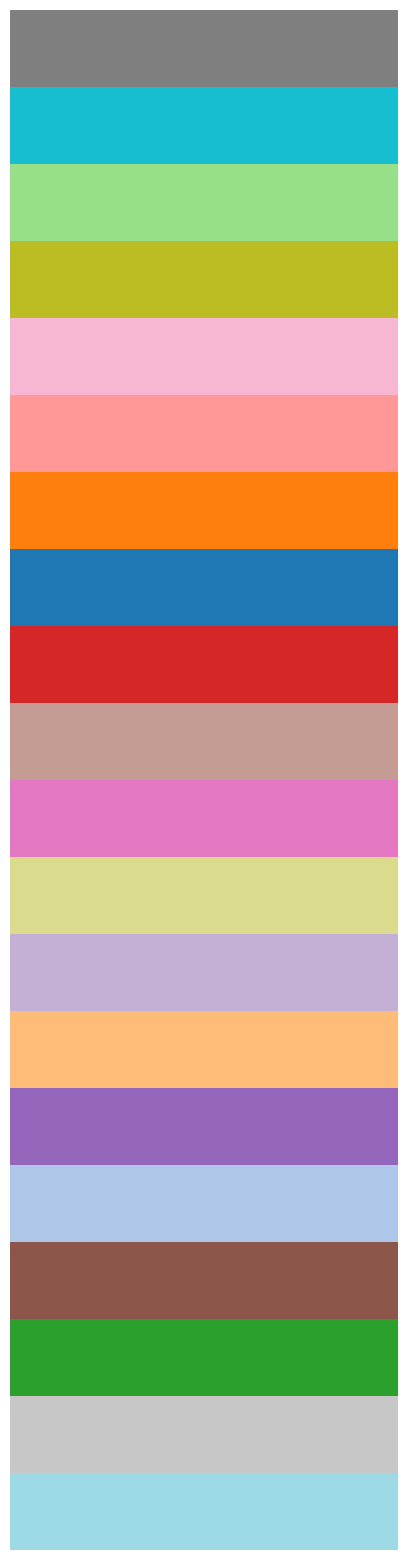

In [10]:
def display_colors(color_list):
    # Create figure and axes
    fig, ax = plt.subplots(figsize=(5, len(color_list)))

    # Display each color as a rectangle
    for idx, color in enumerate(color_list):
        rect = patches.Rectangle((0, idx), 5, 1, linewidth=1, edgecolor='none', facecolor=color)
        ax.add_patch(rect)

    # Adjust the view
    ax.set_xlim(0, 3)
    ax.set_ylim(0, len(color_list))
    ax.axis('off')  # Hide the axis
    plt.show()

cmap = plt.cm.tab20

# Extract colors from the colormap
colors = [cmap(i) for i in range(cmap.N)]
random.shuffle(colors)
display_colors(colors)

### Greedy golor a graph

In [11]:
def greedy_color_graph(Graph,random_order=False,position_function=nx.circular_layout,with_labels=False):
    vertices = list(Graph.nodes())
    if random_order:
        np.random.shuffle(vertices)

    N=len(vertices)
    coloring_rule=dict()
    for node in vertices:
        coloring_rule[node]="black"
    frames=[coloring_rule.copy()]
    for node in vertices:
        forbiden=[coloring_rule[item] for item in G.neighbors(node)]
        for color in colors:
            if color not in forbiden:
                coloring_rule[node]=color
                frames.append(coloring_rule.copy())
                break
            
        #print(forbiden)
    coloring_list=[coloring_rule[node] for node in Graph.nodes()]

    fig, ax = plt.subplots()
    nx.draw(G,pos=position_function(G),node_color=coloring_list,node_size=100)
    #plt.show()
    plt.close(fig)
    ans=dict()
    ans["coloring_rule"]=coloring_rule
    ans["number of colors"]=len(set(list(coloring_rule.values())))
    ans["frames"]=frames
    ans["image"]=fig
    return ans

In [ ]:
#G=nx.grid_2d_graph(5,5)
G =hexagonal_lattice_graph(4)
#pos = hexagonal_positions(G)
#G=nx.erdos_renyi_graph(20,0.3)
#G=nx.barabasi_albert_graph(20,4)
#G=nx.cycle_graph(6)

#G=nx.complete_graph(6)

In [12]:
res=greedy_color_graph(G,random_order=False,position_function=hexagonal_positions)

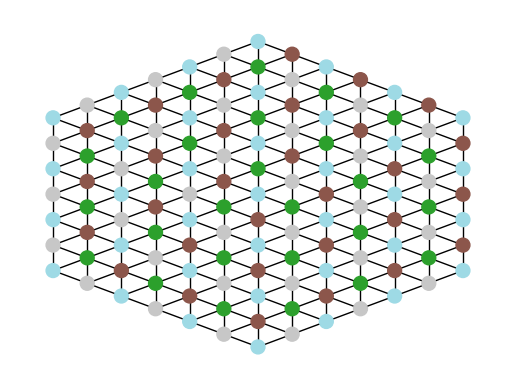

In [13]:
res["image"]


In [14]:
res["number of colors"]

4

In [15]:
res["frames"][3]

{(-6, 0, 6): (0.6196078431372549, 0.8549019607843137, 0.8980392156862745, 1.0),
 (-6, 1, 5): (0.7803921568627451, 0.7803921568627451, 0.7803921568627451, 1.0),
 (-6, 2, 4): (0.6196078431372549, 0.8549019607843137, 0.8980392156862745, 1.0),
 (-6, 3, 3): 'black',
 (-6, 4, 2): 'black',
 (-6, 5, 1): 'black',
 (-6, 6, 0): 'black',
 (-5, -1, 6): 'black',
 (-5, 0, 5): 'black',
 (-5, 1, 4): 'black',
 (-5, 2, 3): 'black',
 (-5, 3, 2): 'black',
 (-5, 4, 1): 'black',
 (-5, 5, 0): 'black',
 (-5, 6, -1): 'black',
 (-4, -2, 6): 'black',
 (-4, -1, 5): 'black',
 (-4, 0, 4): 'black',
 (-4, 1, 3): 'black',
 (-4, 2, 2): 'black',
 (-4, 3, 1): 'black',
 (-4, 4, 0): 'black',
 (-4, 5, -1): 'black',
 (-4, 6, -2): 'black',
 (-3, -3, 6): 'black',
 (-3, -2, 5): 'black',
 (-3, -1, 4): 'black',
 (-3, 0, 3): 'black',
 (-3, 1, 2): 'black',
 (-3, 2, 1): 'black',
 (-3, 3, 0): 'black',
 (-3, 4, -1): 'black',
 (-3, 5, -2): 'black',
 (-3, 6, -3): 'black',
 (-2, -4, 6): 'black',
 (-2, -3, 5): 'black',
 (-2, -2, 4): 'black

### Check that a coloring is valid


In [16]:
def check_coloring(Graph,coloring):
  
    if set(coloring.keys())!=set(Graph.nodes()):
        return "The coloring dictionary does not have the nodes of the graph as keys"
    else:
        ans="Valid Coloring"
        vertices=list(G.nodes())
        pairs = list(combinations(vertices, 2))
        for x,y in pairs:
            if coloring[x]==coloring[y] and y in G.neighbors(x):
                print(x,y)
                ans= "Invalid Coloring"
                break
        return ans

In [17]:
rule=res["coloring_rule"]

In [18]:
bad_rule=dict()
for item in G.nodes():
    bad_rule[item]="black"

In [19]:
check_coloring(G,rule)

'Valid Coloring'

## Animating greedy coloring

In [20]:
def animate_greedy_coloring(G,random_order=False,position_function=nx.circular_layout,with_labels=False):
    frames=greedy_color_graph(G,random_order=random_order,position_function=position_function,with_labels=with_labels)["frames"]
    pos = nx.circular_layout(G)  # positions for all nodes. There are other possibilities fo layout...
    fig, ax = plt.subplots()
    def update(frame):
        ax.clear()
        node_colors=[frame[node] for node in G.nodes()]
        nx.draw_networkx_edges(G, pos=position_function(G), ax=ax)
        nx.draw_networkx_nodes(G, pos=position_function(G), nodelist=G.nodes, node_color=node_colors, ax=ax)
        if with_labels:
            nx.draw_networkx_labels(G, pos, ax=ax)

    ani = FuncAnimation(fig, update, frames=frames, repeat=True)

    # Convert the animation to a JSHTML representation
    ani_jshtml = ani.to_jshtml()

    # Display the animation
    return(HTML(ani_jshtml))

In [43]:
G=nx.complete_bipartite_graph(5,4)
#G=nx.grid_2d_graph(5,6)
#G=hexagonal_lattice_graph(3)

/opt/miniconda3/envs/topics_alg/lib/python3.11/site-packages/matplotlib/cbook.py:1072: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)


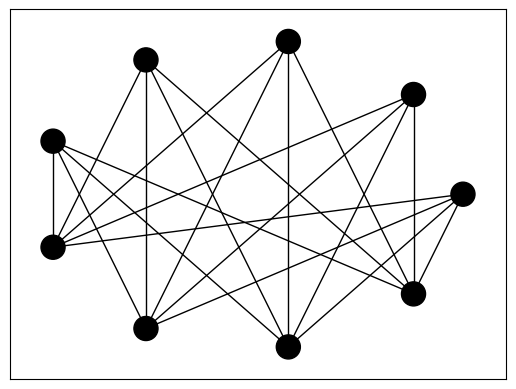

In [44]:
animate_greedy_coloring(G,random_order=False)

In [36]:
C=nx.cycle_graph(10)

/opt/miniconda3/envs/topics_alg/lib/python3.11/site-packages/matplotlib/cbook.py:1072: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)


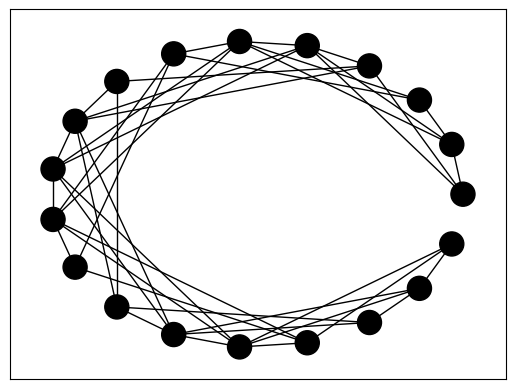

In [42]:
animate_greedy_coloring(G,random_order=True)